**Introduction**

This project utilizes the **K-Means Clustering **algorithm to **segment customers** **based on their Annual Income and Spending Score**from a mall dataset.

Goal is to identify distinct customer groups that can be targeted with specific marketing strategies or business insights. We will preprocess the data, determine the optimal number of clusters, apply the K-Means algorithm, visualize the results, and interpret the clusters.

In [86]:
pip install kneed

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator


**Here NumPy and Pandas** are used for** data manipulation and handling.**

**Matplotlib and Seaborn **are for creating visualizations.

**StandardScaler** helps **scale the features **to ensure all features contribute equally to the clustering.

**LabelEncoder** is used to **convert categorical values (like Gender) to numerical values.**

**KMeans** is the **clustering algorithm** that will be used to divide customers into groups.

**KneeLocator** helps identify the **"elbow"** point in the WCSS (Within-Cluster Sum of Squares) graph **to find the optimal number of clusters.**


**IMPORTING THE DATASET**

In [88]:
data = pd.read_csv('/content/Mall_Customers.csv')
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**TO DISPLAY FIRST FEW ROWS OF THE DATA STRUCTURE**

In [89]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**TO DISPLAY LAST FEW ROWS OF THE DATA STRUCTURE**

In [90]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**TO FIND NUMBER OF ROWS AND COLUMNS**

In [91]:
data.shape

(200, 5)

**TO PROVIDE STATISTICAL SUMMAIRES OF DATA STRUCTURE**

In [92]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**DISPLAY BASIC INFORMATION ABOUT THE COLUMNS INCLUDING DATATYPES.**

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**CHECK FOR ANY NULL VALUES TO ENUSRE DATA QUALITY**

In [94]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**to Encode categorical columns like Gender **


beacuse without encoding of feature column gender into float it is not possible to calculate the correlation values unless all the values are numerical.

The Gender column is encoded from text ('Male'/'Female') into numerical values (0/1) because most machine learning algorithms, including K-Means, require numerical input.


The LabelEncoder converts 'Male' to 1 and 'Female' to 0.

ThE below matrix helps to identify relationships between features, guiding us to choose relevant features for clustering.

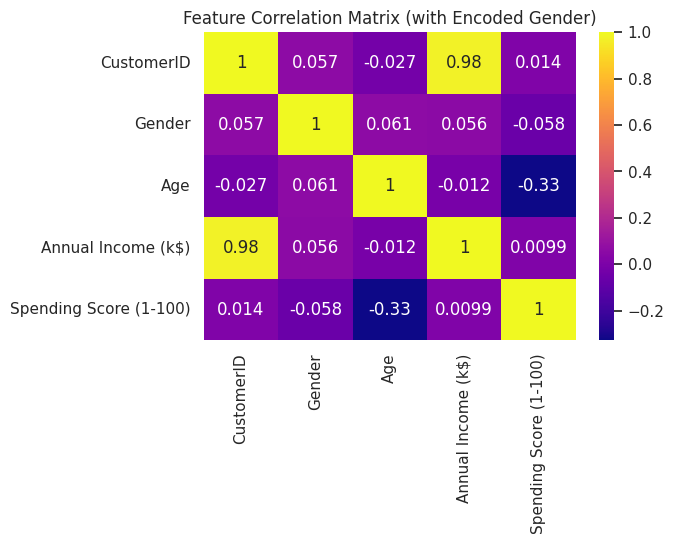

In [95]:
# Encode categorical columns like Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Re-generate heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='plasma')
plt.title('Feature Correlation Matrix (with Encoded Gender)')
plt.show()


**SELECTING FEATURES FOR CLUSTERING**

Choosing the Annual Income Column & Spending Score column

In [96]:
X = data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [97]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Data:")
print(X_scaled)

Scaled Data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -

StandardScaler is used to scale the features (Annual Income and Spending Score).

Scaling ensures both features have the same scale (mean of 0, standard deviation of 1).

This is important for K-Means, as the algorithm uses distance calculations (Euclidean distance) between points, and unscaled data could bias the clustering process.

**FINDING THE OPTIMUM NUMBER OF CLUSTERS USING ELBOW METHOD**

In [98]:
# finding wcss(Within-Cluster Sum of Squares) value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

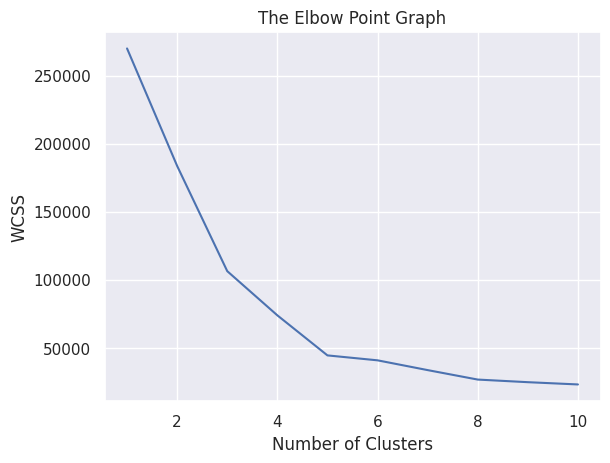

In [99]:
#Elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
# Optimal number of clusters using KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 5


From the graph, it is seen that the optimum number of clusters is 5. To cross-validate this, the above method using the "kneedle" technique was applied for verification.

Next, the k-Means Clustering model is being trained.

**TRAINING THE K-MEANS MODEL**

In [101]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


There are 5 Clusters -  0, 1, 2, 3, 4

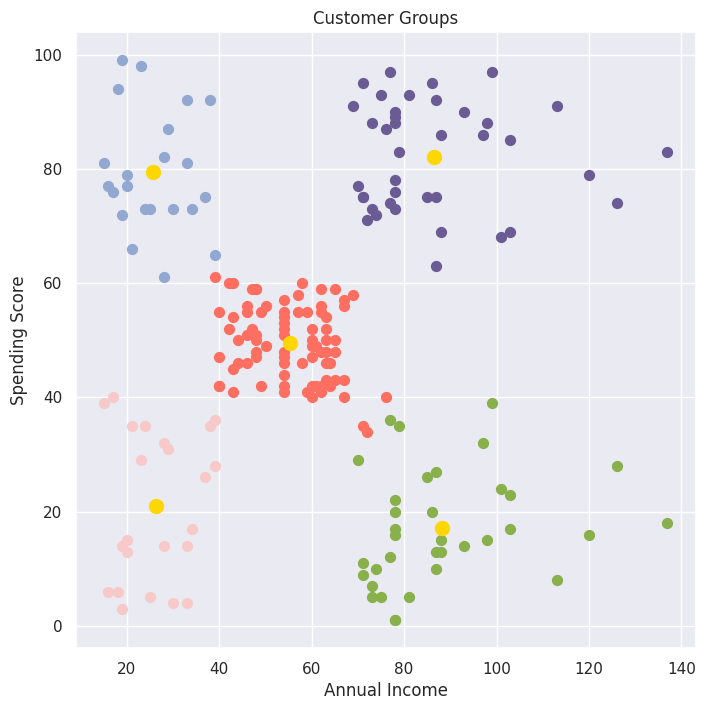

In [102]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='#FF6F61', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='#6B5B95', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='#88B04B', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='#F7CAC9', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='#92A8D1', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='#FFD700', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**PROFILING EACH CLUSTER AND PLOTTING OTHER PLOT**

In [103]:
# Cluster Profiles
data = data.copy()
data['Cluster'] = Y
for i in range(optimal_clusters):
    print(f"\nCluster {i} Statistics:")
    print(data[data['Cluster'] == i].describe())


# Optional plot: Interactive Visualization using Plotly
import plotly.express as px
fig = px.scatter(data, x='Annual Income (k$)', y='Spending Score (1-100)',
                 color=Y.astype(str), title='Clusters of Customers',
                 labels={'color': 'Cluster'})
fig.show()


Cluster 0 Statistics:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   81.000000  81.000000  81.000000           81.000000   
mean    86.320988   0.407407  42.716049           55.296296   
std     24.240889   0.494413  16.447822            8.988109   
min     44.000000   0.000000  18.000000           39.000000   
25%     66.000000   0.000000  27.000000           48.000000   
50%     86.000000   0.000000  46.000000           54.000000   
75%    106.000000   1.000000  54.000000           62.000000   
max    143.000000   1.000000  70.000000           76.000000   

       Spending Score (1-100)  Cluster  
count               81.000000     81.0  
mean                49.518519      0.0  
std                  6.530909      0.0  
min                 34.000000      0.0  
25%                 44.000000      0.0  
50%                 50.000000      0.0  
75%                 55.000000      0.0  
max                 61.000000      0.0  

Cluster 1 Statistics:
       CustomerID

**CONCLUSION :**

This project successfully segments customers into 5 distinct groups based on Annual Income and Spending Score using K-Means Clustering. By profiling these clusters, we gain valuable insights into customer behavior, which can be useful for targeted marketing and customer engagement strategies. The optimal number of clusters was determined using both the Elbow Method and KneeLocator for accuracy. The final model has been saved and can be reused for future predictions or insights.